## ML Final Project

#### **Scenario:** You work at a multinational bank that is aiming to increase it's market share in 
Europe. Recently, it has been noticed that the number of customers using the banking 
services has declined, and the bank is worried that existing customers have stopped 
using them as their main bank. <br> 

As a data scientist, you are tasked with finding out the 
reasons behind customer churn (when a customer stops using them as the main bank) and to predict customer churn. <br> 

The marketing team, 
in particular, is interested in your findings and want to better understand existing 
customer behavior and possibly predict customer churn. Your results will help the 
marketing team to use their budget wisely to target potential churners. To achieve 
this objective, in this exercise, you will import the banking data (Churn_Modelling.csv) 
provided by the bank and do some machine learning to solve their problem.

Data dictionary

- CustomerID: Unique ID of each customer
- CredRate: Credit Score of the customer 
- Geography: Country customer is from 
- Gender
- Age
- Tenure: How long customer has been with bank 
- Balance : the amount of money customer has/had with the bank
- Prod Number: Number of products customer has with bank 
- HasCrCard: Does customer have credit card
- ActMem: Is customer active member 
- Estimated salary: Annual estimated salary of customer 
- Exited: Whether customer has churned (1 is yes)

## (A) Introduction

### Objective 
Increase market share in Europe 


### Problem statement 

The number of customers using the banking services has declined, and the bank is worried that existing customers have stopped using them as their main bank.

### Finding and ouput
1) Customers churning reasons\
2) Predict customers churn /customer rate of attrition\
3) Marketing team - budget wisely to target potential churners

### Summarise 
Predict the reasons and potential churners to maketing team to use the budget wisely to the target potential churners (predicting and prevention churn). 

Hence to achieve the objective in :\
1) retaining current customer \
2) gaining a new target market to increase the market share in Europe.\
3) to build a customer churn prediction model.


### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

## (B) Data understanding

### Import dataset

In [2]:
churn_data=pd.read_csv('Churn_Modelling.csv')

### View some rows of datasets and statistical information 

In [3]:
churn_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data.shape

(10000, 12)

### Observation

The churn data has 10,000 rows and 12 attributes

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


### Observation 

From 12 atributes, 10 are numeric attributes and 2 are categorical or object attributes.

In [6]:
churn_data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Obervatios of basic statistical from raw dataset : 

1)10,000 rows of observations and 12 columns of variables.

2)Mean/Average : \
  Age : 38 years old \
  Tenure : 5 years\
  Balance : $76,485\
  Product number : 1.5\
  Credit card : 0.7\
  Active member : 0.5

** Average age customer with bank a middle age.

** The average balance with the bank ia quite low 76485 compare to the max value of 250898.

** Customer stay with the bank for average 5 years which is consider average compare to the max tenure is 10 years.

** The product number with the bank quite low which the average of 1.5 compare to the max of 4. 

** Active member is 50% .

** Customer with the bank who holding the bank's credit card are 70%.
  
  
  


### Drop  irrelavant columns

Drop customer ID columns : irrelavant in produce important information in predictions.

In [7]:
churn_data.drop(['CustomerId'] , axis=1 ,inplace =True )
churn_data.head()

,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### Check and drop duplicates data

In [8]:
churn_data.drop_duplicates()
churn_data.shape

(10000, 11)

### Observation: 
No duplicates data

## (C) Check missing data

In [9]:
churn_data.isnull().sum()

CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

### Observation of the missing values :

1) Gender : 4\
2) Age : 6\
3) Estimated Salary : 4

### Missing values for Gender :  Drop the 4 rows 
Why : unsure of the sex and have difficulty in imputation of the gender.

In [10]:
churn_data.dropna(axis=0 , subset = ['Gender'] , inplace=True)
churn_data.shape

(9996, 11)

### Missing values for Age and Estimated Salary : Imputaion with central tendency measures : mean, mode or median

### Before decided to use mean , mode or median to replace the missing values,  use of box plot  to understand the data and inspect the outlier. 



### Box plot for age data points

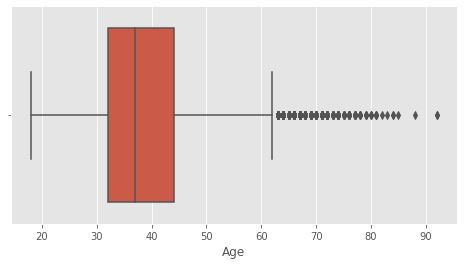

In [11]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(churn_data.Age)

### Observation from Age data points box plot

#### Missing values for Age : Imputaion with median values

From the box plot of Age data points, we note that the data is skewed to the right .

There are several high age customers in the data points and which act as outliers.

Outliers data points will have significant impact on the mean .

Hence, it is not recommended to use mean for the Age missing values imputation.

Using mean value for replacing missing values are not suitable and may not create a great model.


### Imputation of Age missing values with median values

In [12]:
median_age = churn_data.Age.median()
print(median_age)

churn_data.Age.fillna(median_age , inplace =True)


37.0


### Box Plot for Estimated Salary data points

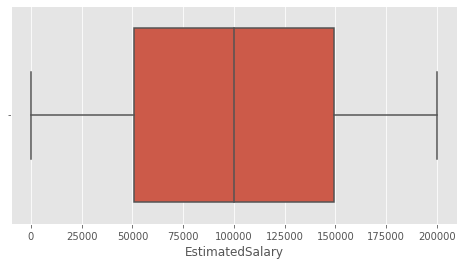

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(churn_data.EstimatedSalary)

### Observation from Estimated Salary data points  box plot : 

For symmetric data distribution in Estimated Salary data and imputing missing values using  mean value are appropriate and suitable .




### Imputation of Estimated Salary missing values with mean values.

In [14]:
mean_es = churn_data.EstimatedSalary.mean()

formatted_float = "{:.2f}".format(mean_es)
print(formatted_float)

churn_data.EstimatedSalary.fillna(formatted_float , inplace=True)

100074.50


### Convert estimated salary data points to float numner after the imputaion.

In [15]:
churn_data = churn_data.astype({"EstimatedSalary":'float64'} ) 

### Inspect the data set 

In [16]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CredRate         9996 non-null   int64  
 1   Geography        9996 non-null   object 
 2   Gender           9996 non-null   object 
 3   Age              9996 non-null   float64
 4   Tenure           9996 non-null   int64  
 5   Balance          9996 non-null   float64
 6   Prod Number      9996 non-null   int64  
 7   HasCrCard        9996 non-null   int64  
 8   ActMem           9996 non-null   int64  
 9   EstimatedSalary  9996 non-null   float64
 10  Exited           9996 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 937.1+ KB


In [17]:
churn_data.shape

(9996, 11)

### Observation : 

No missing values in the data set.

## (C) Data Visualization
## Exploratory analysis and plots

### Check the relative size of churned and not-churned

In [18]:
churn_data.Exited.value_counts(1)

0    0.796319
1    0.203681
Name: Exited, dtype: float64

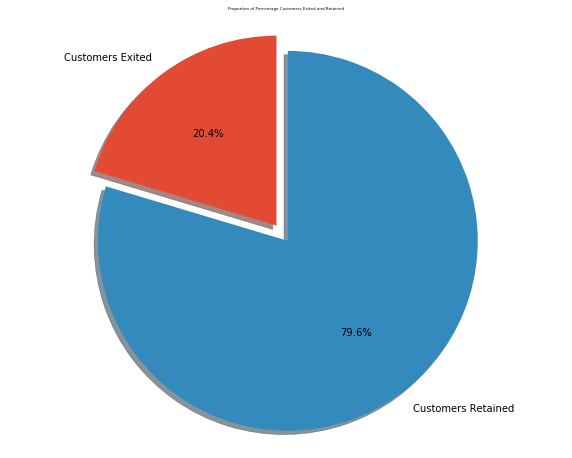

In [19]:
labels = 'Customers Exited', 'Customers Retained'
sizes = [churn_data.Exited[churn_data['Exited']==1].count(), 
         churn_data.Exited[churn_data['Exited']==0].count()]

explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Percentage Customers Exited and Retained ", size = 4)

plt.show()


### Observation on the size of churned and not -churned 

#### Percentage of churned is 20% 
#### Percentage of not-churned 80%

The percentage of churned and not churned is till acceptable . Nevetherless, we have to take note that the active member percentage of 50% mentioned earlier. Hazard lights!!!





### Explore the pattern in exited based on active member

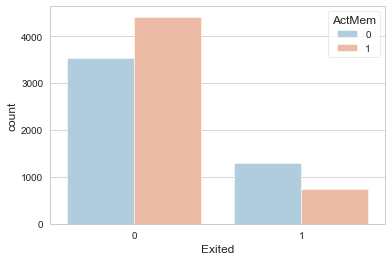

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='ActMem',data=churn_data,palette='RdBu_r')

Unsurprisingly the inactive members have a greater churn. 

On the other hand , the overall proportion of inactive members is quite high.

The bank may need to  implemented attractive promotions or products to turn this group to active customers.

Inactive members have the high chance to be a  potential churners in future.


### Explore the pattern in exited data based on  gender

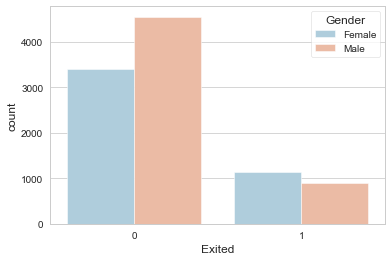

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Gender',data=churn_data,palette='RdBu_r')

### Observation : 

#### Potential churners for females in higher than males .


### Insight in the exited data based on geography and gender.


In [22]:
churn_data1=churn_data.groupby(['Exited' , 'Geography'])['Gender'].value_counts()
pd.DataFrame(churn_data1)

Gender
Exited Geography Gender        
0      France    Male      2402
                 Female    1801
       Germany   Male       949
                 Female     745
       Spain     Male      1205
                 Female     858
1      France    Female     460
                 Male       350
       Germany   Female     448
                 Male       366
       Spain     Female     231
                 Male       181

### Observation : 

Gender females from 3 countries potential to churned out are higher comparison to males.

1) France: Female = 460 out of 810 (56%)\
2) Spain  : Female = 231 out of 412((56%)\
3) Germany : Female = 448 out of 814 (55%)

### Overall distribution of Age data points 

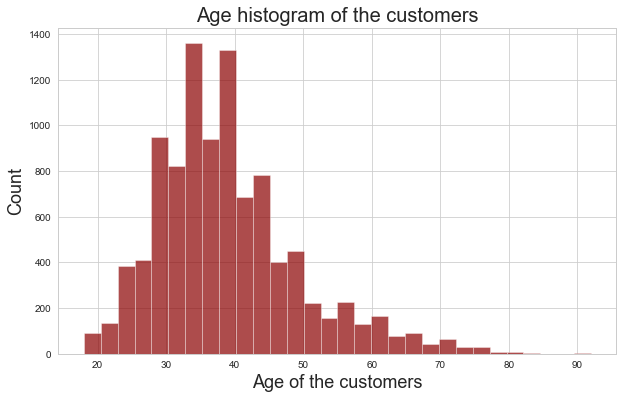

In [23]:
plt.xlabel("Age of the customers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the customers",fontsize=20)
churn_data['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

## Observation age data points : 
Majority age group of customers are from 30 to 50 years old.

### Age distribution across Exited using box plot

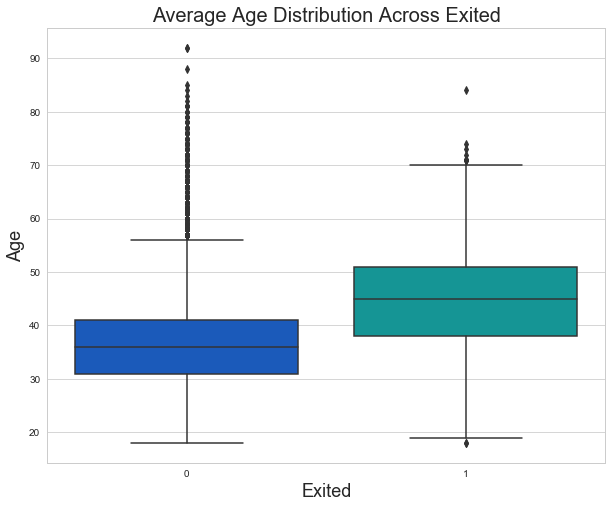

In [24]:
plt.figure(figsize=(10, 8))
plt.xlabel("Exited",fontsize=18)
plt.ylabel("Average Age",fontsize=18)
plt.title('Average Age Distribution Across Exited', fontsize=20)
sns.boxplot(x='Exited',y='Age',data=churn_data,palette='winter')

### Observation Age vs Exited

Customers churned out at average age of 45 years old. 

Customers choose to churned out from the bank services when age increased. 

###  Estimated Salary distribution across Exited using box plot

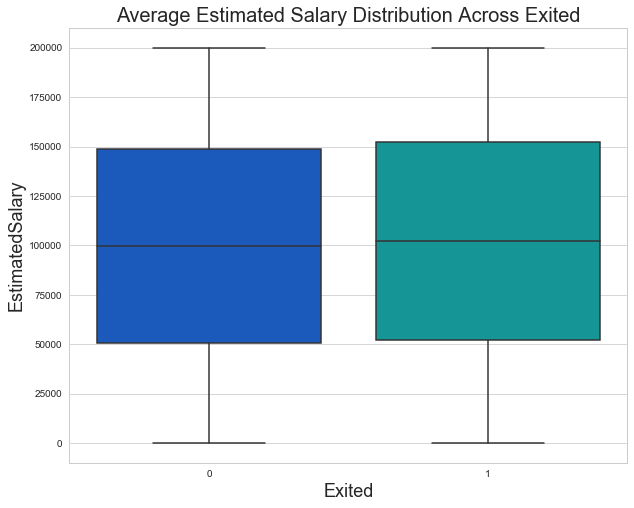

In [25]:
plt.figure(figsize=(10, 8))
plt.xlabel("Exited",fontsize=18)
plt.ylabel("Average Estimated Salary",fontsize=18)
plt.title('Average Estimated Salary Distribution Across Exited' , fontsize=20)
sns.boxplot(x='Exited',y='EstimatedSalary',data=churn_data,palette='winter')

### Observation : 

The average estimated salary for churned and not churned are merely the same at 100,000.\
No significant insight from the change in estimated salary to churned or not-churned.

### Explorethe trend of  Tenure data across Exited Data

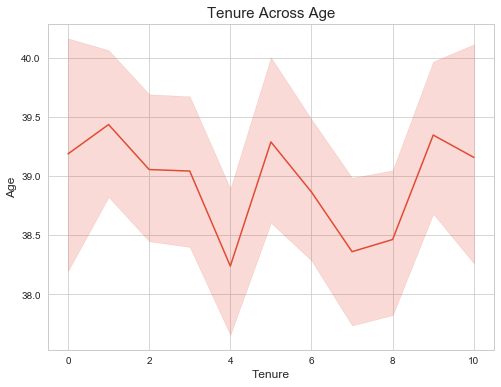

In [26]:
plt.figure(figsize=(8,6))
plt.title('Tenure Across Age' , fontsize=15)
sns.set_style('whitegrid')
sns.lineplot(x='Tenure',y='Age',data=churn_data)

### Observation : 

Customers churned out from using bank services from year 1 onwards.

Dropping drasstically on year 4 and flactuate along the tenure.

This give a idea that the bank need to put more effort in retain customers and convert them to long term customers.

### Explore the pattern in exited data based on  geography area

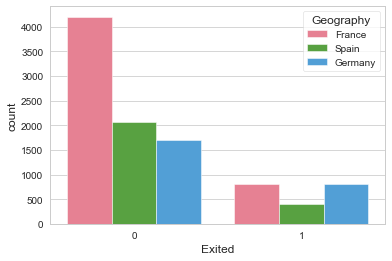

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Geography',data=churn_data,palette=("husl"))

### Observation :¶
Customers churned out for Germany (814) is higher comparison to Spain(412) and France(810).

The exited reasons may caused by inssuficient knowledge and awareness of the customers about the bank produts . Hence need to allocate the budget efficiently in create the product awareness among to the current customers to decrease the numbers of customers churn.

### Explore the trend comparison : geography vs age and balance 

In [28]:
churn_data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [29]:
churn_pivot1 =churn_data.pivot_table(values=["Balance"] , index=["Age"] , columns=["Geography"])

churn_pivot1.head(10)

Geography,France,Germany,Spain
Age,,,
18.0,82461.696364,116642.520000,26959.374000
19.0,55266.271818,120374.911250,41580.036250
20.0,63181.477143,132949.565000,70542.091538
21.0,71042.550323,116411.708182,49206.994545
22.0,64759.039333,110500.741818,57153.213214
23.0,66631.048222,124380.004074,52506.338519
24.0,57562.646712,109408.130370,79248.773871
25.0,54215.392609,122529.175217,66814.066316
26.0,72345.845398,116530.587209,62019.402500


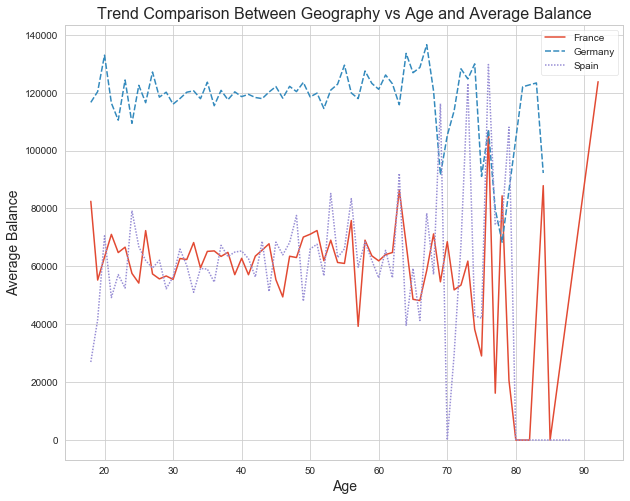

In [30]:
plt.figure(figsize=(10,8))
plt.xlabel("Age",fontsize=14)
plt.ylabel("Average Balance",fontsize=14)
plt.title('Trend Comparison Between Geography vs Age and Average Balance', fontsize=16)
sns.lineplot(data=churn_pivot)

### Observation from the trend : 

1) The average balance has/had with the bank is stable from the age between 20 to 65 years old.

2) Decrease drastically after the age of 65 years old.

3) The average balance has/had with the bank for Germany is higher comparison to  France and Spain.

Suggestion : 

Redefine the target market  to different demography groups of age to meet the needs :\
1) 20 to 35 years old (balance money in the bank quite high)\
2) 30 to 45 years old (balance money in the bank quite high and reach the age of 45 years old the chances to quit from the bank is high.---- Refer to Age distribution across Exited.



### Explore the trend comparison : exited vs age and customer has credit card with bank

In [31]:
churn_pivot1 =churn_data.pivot_table(values="HasCrCard" , index=["Age"] , columns=["Exited"])

churn_pivot1.head(10)

Exited,0,1
Age,,
18.0,0.650000,0.500000
19.0,0.807692,1.000000
20.0,0.684211,0.000000
21.0,0.720000,0.666667
22.0,0.694444,0.666667
23.0,0.677419,0.666667
24.0,0.692308,0.642857
25.0,0.721088,0.666667
26.0,0.693548,0.714286


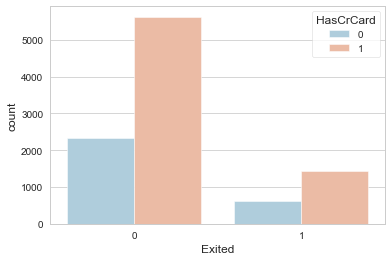

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='HasCrCard',data=churn_data,palette='RdBu_r')

In [33]:
churn_data.HasCrCard.value_counts(1)

1    0.705482
0    0.294518
Name: HasCrCard, dtype: float64

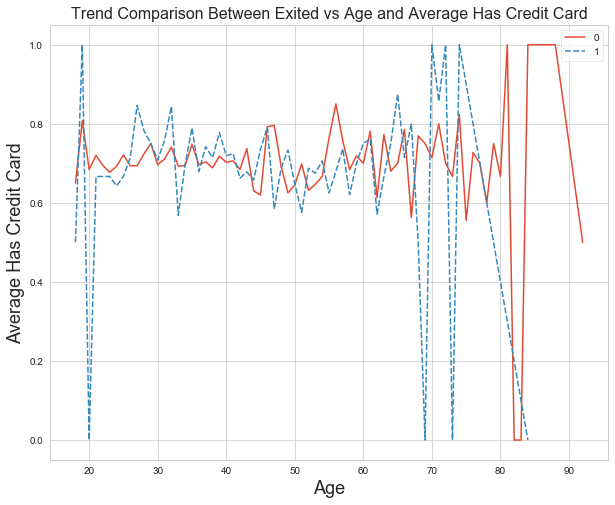

In [45]:
plt.figure(figsize=(10,8))
plt.xlabel("Age",fontsize=18)
plt.ylabel("Average Has Credit Card",fontsize=18)
plt.title('Trend Comparison Between Exited vs Age and Average Has Credit Card', fontsize=16)
sns.lineplot(data=churn_pivot1)

### Obsevation : 

Churned out even the average credit rates are high especially at hte young and middle age. 

Maybe this related to the bank policy that customers who need to apply the credit card have to open the accounts with bank. They churn after thte credit card application being approved. ---(undefine, need more recource to define )

Majority of the customers that churned are those with credit cards

### Explore the trend comparison : exited vs age and balance

In [48]:
churn_pivot1 =churn_data.pivot_table(values="Balance" , index=["Age"] , columns=["Exited"])

churn_pivot1.head(10)

Exited,0,1
Age,,
18.0,87086.532500,0.000000
19.0,70002.825385,83495.110000
20.0,73679.841842,120860.805000
21.0,70593.564000,164815.530000
22.0,64880.433472,88213.640833
23.0,78368.347097,81012.023333
24.0,72655.285812,79438.305714
25.0,74894.752517,151101.675000
26.0,77878.594409,102095.066429


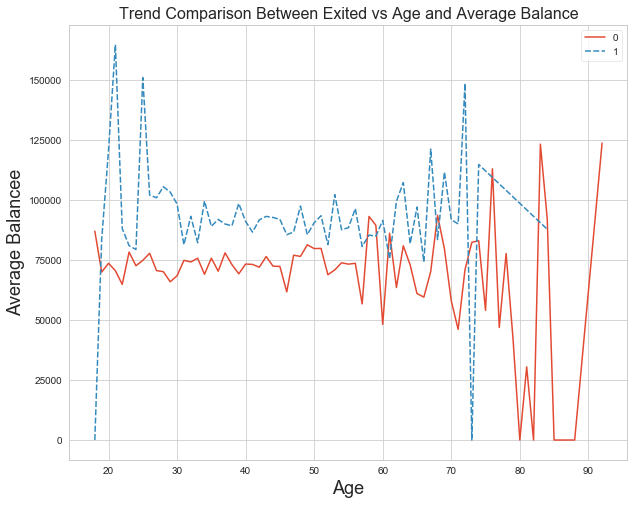

In [49]:
plt.figure(figsize=(10,8))
plt.xlabel("Age",fontsize=18)
plt.ylabel("Average Balancee",fontsize=18)
plt.title('Trend Comparison Between Exited vs Age and Average Balance', fontsize=16)
sns.lineplot(data=churn_pivot1)

### Exited across average age and Gender 

In [50]:
churn_pivot2 =churn_data.pivot_table(values="Age" , index=["Exited"], columns=["Gender"] )

churn_pivot2.head()

Gender,Female,Male
Exited,,
0,37.383373,37.432836
1,44.784899,44.907469


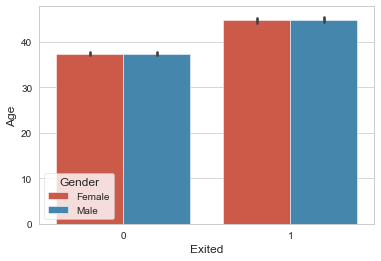

In [51]:
from numpy import mean
sns.barplot(x="Exited", y="Age", hue="Gender", data=churn_data , estimator = mean)

### Observation :

Females and males churned out at the average age of 45 years old.

Bank may consider to redefine a new market target to more young costomer group as from the trend show above the balance money in the bank for group age from 20 to 30 years old. 

### Conclusion from data understanding and visualization (EDA) :

**Finding and ouput**

1) Define Potential chuners base on  demographical evaluation: 
   Females aged 45 years old and above from France 56% , Spain 56% and Germany 55%.  

2) Tenure : 
   customers start to churned out from the bank in a year time and are consider not a long-term        customers with the bank. Low customers retention rate .

3) Credit rate :  customers choose to churned out even the credit rates are high. 

4) Difficulty in define the reasons why for potential churners:
   Due to limitaion of database .
   Implementation of researches and surveys are essential in gathering more relevant database in  defining the reasons of potential churners such as :
   
   a) product details and infromations (what the products did the customers purchase most)\
   b) active members (how to define the customers is a active member)\
   c) Balance money in the bank -- we dicover that some of the exited customers still have the balance with our bank.---- Refer to Explore the trend comparison : exited vs age and balance.)

## (D) Data preprocessing and Data preparation

### Encoding categorical variables to numeric  as most of the algorithms are designed to work on numeric data. 

### Categorical variables from database are :

1) Geography\
2) Gender

Encoding method : one-hot encoding to transform a categorical feature with n possible classes into n binary features.

In [67]:
churn_dataENC = pd.get_dummies(churn_data[['Geography' , 'Gender']] ,drop_first=True)
churn_data = pd.concat([churn_data , churn_dataENC] , axis=1)
churn_data.head()


,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0


In [68]:
del churn_data['Geography']
del churn_data['Gender']
churn_data.head()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39.0,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0


### Data preparation

**Divide the data into "attributes"(X) and "labels"(Y)**

Define labels/target = Exited (Y)

Output (Y) Predict customers churn depends on the input of features/variables/attributes (X)


In [69]:
X = churn_data.drop('Exited' , axis=1)
Y = churn_data['Exited']

#### SPLIT DATA SET TO TRAIN AND TEST 

split the data into train and test sets

**Golden split values of 80 : 20**\
80% of the data to train set while 20% of the data to test set 

**Set random state=111**\
Purpose is using the same set for model training 


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=111)

In [71]:
X_train.shape 


(7996, 11)

In [72]:
X_test.shape

(2000, 11)

### Feature Scaling using standard scalers from scikit-learn API on train and test set 

Important pre-processing step to standardizing/normalization  features by removing the mean and scaling to unit variance or to common level and then apply to further machine learning algorithm (regression or distance algo) to the input data.

To compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. This class is hence suitable for use in the early steps.

Scaling to train and test data individually to avoid bias.

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc= sc.fit_transform(X_test)

In [74]:
X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X.columns
X_train_sc.head()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.801518,0.392554,-0.005631,-1.219797,-0.914412,0.643794,0.973829,0.343146,-0.580046,1.743096,-1.089262
1,-0.614349,0.392554,-0.698376,-1.219797,0.815334,-1.553293,0.973829,1.710934,-0.580046,-0.573692,0.918053
2,-0.128614,-0.467356,-0.005631,0.914573,-0.914412,-1.553293,0.973829,0.959998,-0.580046,-0.573692,0.918053
3,-2.257581,-1.136175,0.340741,-0.223131,0.815334,-1.553293,-1.026874,-0.805613,-0.580046,-0.573692,-1.089262
4,-0.128614,-0.180719,0.687113,0.770881,0.815334,0.643794,-1.026874,1.011488,1.724001,-0.573692,-1.089262


In [75]:
X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X.columns
X_test_sc.tail()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1995,-1.735268,0.089312,0.686965,0.480126,0.777486,-1.525709,-1.046060,0.332350,1.743675,-0.573501,0.891814
1996,-0.321142,2.645137,-0.686965,-1.251107,0.777486,0.655433,0.955968,-0.977975,-0.573501,-0.573501,-1.121310
1997,0.656269,1.509215,1.373930,1.665152,-0.901750,0.655433,0.955968,0.017449,1.743675,-0.573501,-1.121310
1998,-0.799449,0.373292,-0.686965,1.038000,-0.901750,0.655433,0.955968,0.018499,1.743675,-0.573501,-1.121310
1999,0.635473,-0.478649,1.030447,0.596516,-0.901750,0.655433,-1.046060,-0.111425,-0.573501,-0.573501,0.891814


## (E) Machine Learning

#### Supervised learning : 

The machine learning task of learning a function that maps an input (X) to an output(Y) in this case is "Exited" ,  based on example input-output pairs. 

It infers a function from labeled training data consisting of a set of training examples.


### Classification : 

Classification is a subcategory of supervised learning where the goal is to predict the categorical class labels of new instances based on past observations. where in this case are two classses

churn    (yes) =  positive class , label as 1\
not-churn (no) =  negative class, label as 0 




### Supervised Classification Algorithm to try on 

1) Logistic regression\
2) Sopport vector machine


### Ensemble methods
1) Random Forest\
2) Gradient Boosting

Ensemble methods combine several
machine learning techniques into one
predictive model in order to decrease
variance (bagging), bias (boosting), or
improve predictions (stacking).

A good model should maintain a
balance between these two types of
errors: bias and variance. This is known
as the trade-off management of bias variance errors. Ensemble learning is
one way to execute this trade off
analysis.


### The flow as follow in implenting the above algo :

***Stage 1 : Before Features selection***

1) Model training and testing

2) Compare predicted Y and Actual Y

3) Model evaluation with Confusion Matrix and ROC AUC Score

4) Obervation 

***Stage 2 : After Features selection***

1) Model training and testing

2) Compare predicted Y and Actual Y

3) Model evaluation with Confusion Matrix and ROC AUC Score

4) Obervation 

***Stage 3 : Model Tuning with optimal parameter from GridSearchCV and Features Selection***

1) Model tuning 

2) Model evaluation with Confusion Matrix and ROC AUC Score

4) Obervation 



### Model evaluation/validation metrics for classification algo : 

**CONFUSION MATRIX:**\
Describe the performance of a
classification model on a Test Set (true y values are
known). 

**PRECISION :**

Best to use when we want to focus on predicting
correctly the Positive class (reduce false
positives)

TP / Predicted positives

**RECALL:**\
Best to use when we want to capture as many
positives as possible (reduce false negatives)

TP/ Actual positives

**ACCURACY:**\
Best to use when the dataset is balanced and not
skewed (when there’s imbalance of data, this is
not a good choice of measurement)

(TN + TP) / All records trained

**AUC ROC CURVE :**

THE PROBABILITY OF THE CLASS BEING CLASSIFIED CORRECTLY
PLOT TPR AGAINTS FPR

A perfect classifier will have a AUC equal to 1, whereas a purely random classifier will have a
AUC equal to 0.5

***ROC aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better.


### Random state set : 888 

The model trainig using the same subset for easy comparison on the performance

### Objective : Predict potential churners

#### Will focuse on Precision : 

predict the true positive correctly (churned out) 

reduce the false positive (not churned out but predicted 
churned out )

meaning reduce the customers not churned but predicted churned out. 

Impact : As the cost of retaining an existing customer is far less than acquiring a new one or to recall the exited customers.

Predicting correctly will help the marketing team to efficiently distribute the budget and prevent costly marketing strategies.

## Model training before tuning

## 1) Logistic regression 

### Description :
Predicts the probability of occurrence of a binary outcome using a logit function.

This case we predicting if  a customers churned out or not from using bank services.

A logit function is used to describe the probability that a sample belongs
to one of the two classes[0,1] 

The logit function is the inverse of a sigmoid function.
Sigmoid function: The sigmoid function maps arbitrary real values
back to the range [0, 1] 

Using scaled data as it is use for estimating the parameters of a logistic model (a form of binary regression).

### Reason : 

1) Speed or Training time : easy to implement and quick to run.\
2) The best way to find out the linearity is to either fit and check for residual errors. A higher error means the data is not linear and would need complex algorithms to fit.

### Model training with Logistic Regression

### Get basic idea of correlationship between variables 
#### Logistic Regression perform well if the variables are independent to each other.

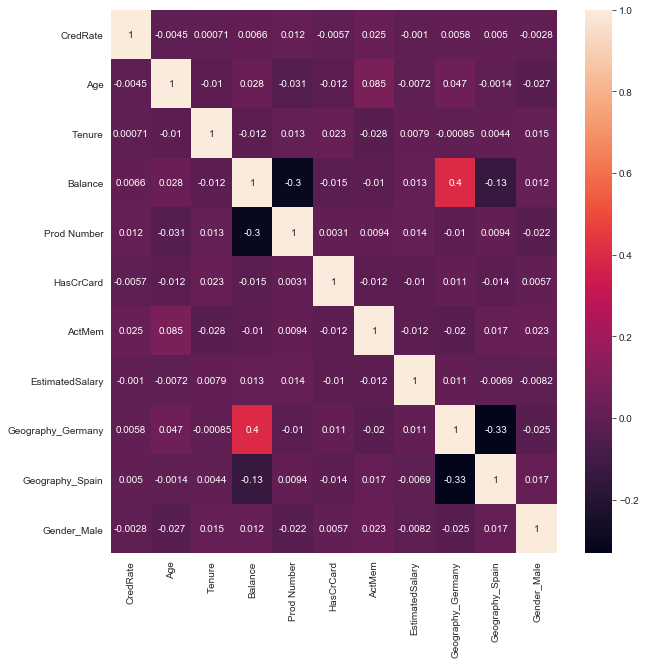

In [76]:
churn_dataX= churn_data.drop('Exited' , axis=1)

plt.figure(figsize = (10, 10))

sns.heatmap(churn_dataX.corr(), annot = True)

### Observation :

The features are independant from each other as the correlation values are low.

All features retain as input for model training for Logistic Regression algo.

#### Model training and testing with Logistic Regression



In [77]:
from sklearn.linear_model import LogisticRegression

LGclassifier = LogisticRegression(random_state = 888)

LGclassifier.fit(X_train_sc, y_train)

LG_y_pred = LGclassifier.predict(X_test_sc)

#### Compare the y pred with y test ,actual y

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': LG_y_pred})

df.head()


,Actual,Predicted
208,1,0
8019,0,1
9487,0,0
5373,0,0
2579,1,0


#### Model evaluation with Confusion Matrix

[[1534   67]
 [ 327   72]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1601
           1       0.52      0.18      0.27       399

    accuracy                           0.80      2000
   macro avg       0.67      0.57      0.58      2000
weighted avg       0.76      0.80      0.76      2000



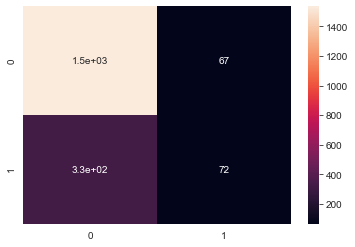

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

LGcm= confusion_matrix(y_test, LG_y_pred)  

print(LGcm) 

sns.heatmap(LGcm, annot=True)

print(classification_report(y_test, LG_y_pred)) 

In [80]:
from sklearn.metrics import roc_auc_score

area_under_curve = roc_auc_score(y_test, LG_y_pred)

print(area_under_curve)


0.569301141673672


### Observation : 

Accuracy score is high 80% but due to imbalance of database 80 % : 20% . will not consider accuracy score in performance evaluation.

Area under curve of 0.57 , purely random classifier can be better. 

## Sequential Feature Selector (Methods to boost the accuracy of a model)

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial n-dimensional feature space to a k-dimensional feature subspace where k < n.

The motivation behind feature selection algorithms is to automatically select a subset of features that is most relevant to the problem.

The goal of feature selection is two-fold: We want to improve the computational efficiency and reduce the generalization error of the model by removing irrelevant features or noise.

In a nutshell, feature selection methods remove or add one feature at the time based on the classifier performance until a feature subset of the desired size k is reached.

### Types : Sequential Forward Selection (SFS) : using X_train_sc (scaled data ) for features selection

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfsLG = SFS(LGclassifier, 
          k_features='best', 
          forward=True, 
           cv=3)


In [82]:
sfsLGF = sfsLG.fit(X_train_sc, y_train)

In [83]:
sfsLGF.k_feature_names_

('CredRate',
 'Age',
 'Tenure',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain')

In [84]:
print('\nSelected feature indices:', sfsLGF.k_feature_idx_)
print('CV Score:', sfsLGF.k_score_)


Selected feature indices: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
CV Score: 0.8132825889399179


In [85]:
pd.DataFrame.from_dict(sfsLGF.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.795198799699925, 0.7954971857410882, 0.7951...",0.795273,"(CredRate,)",0.000364202,0.000161844,0.000114441
2,"(0, 2)","[0.795198799699925, 0.7954971857410882, 0.7951...",0.795273,"(CredRate, Tenure)",0.000364202,0.000161844,0.000114441
3,"(0, 2, 3)","[0.795198799699925, 0.7954971857410882, 0.7951...",0.795273,"(CredRate, Tenure, Balance)",0.000364202,0.000161844,0.000114441
4,"(0, 2, 3, 4)","[0.795198799699925, 0.7954971857410882, 0.7951...",0.795273,"(CredRate, Tenure, Balance, Prod Number)",0.000364202,0.000161844,0.000114441
5,"(0, 2, 3, 4, 5)","[0.795198799699925, 0.7954971857410882, 0.7951...",0.795273,"(CredRate, Tenure, Balance, Prod Number, HasCr...",0.000364202,0.000161844,0.000114441
6,"(0, 2, 3, 4, 5, 6)","[0.795198799699925, 0.7954971857410882, 0.7951...",0.795273,"(CredRate, Tenure, Balance, Prod Number, HasCr...",0.000364202,0.000161844,0.000114441
7,"(0, 1, 2, 3, 4, 5, 6)","[0.805701425356339, 0.8063789868667918, 0.8105...",0.807529,"(CredRate, Age, Tenure, Balance, Prod Number, ...",0.0047787,0.00212356,0.00150158
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.8064516129032258, 0.8146341463414634, 0.818...",0.813282,"(CredRate, Age, Tenure, Balance, Prod Number, ...",0.0115119,0.00511566,0.00361732
9,"(0, 1, 2, 3, 4, 5, 6, 8, 9)","[0.8060765191297824, 0.8146341463414634, 0.818...",0.813157,"(CredRate, Age, Tenure, Balance, Prod Number, ...",0.0118883,0.00528293,0.0037356
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.805701425356339, 0.8138836772983115, 0.8202...",0.813283,"(CredRate, Age, Tenure, Balance, Prod Number, ...",0.0134115,0.00595978,0.0042142


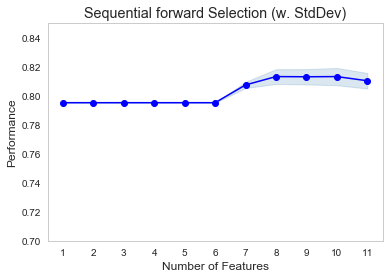

In [86]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfsLGF.get_metric_dict(), kind='std_dev')

plt.ylim([0.70, 0.85])
plt.title('Sequential forward Selection (w. StdDev)')
plt.grid()
plt.show()

The avg score is highest at 10 features.

Clear indication that these having more features doesn't help in the accuracy. 

Stick to a simpler model

In [87]:
X_train_scSFSLG = X_train_sc[['CredRate',
 'Age',
 'Tenure',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain']]

X_train_scSFSLG.head()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Geography_Germany,Geography_Spain
0,0.801518,0.392554,-0.005631,-1.219797,-0.914412,0.643794,0.973829,0.343146,-0.580046,1.743096
1,-0.614349,0.392554,-0.698376,-1.219797,0.815334,-1.553293,0.973829,1.710934,-0.580046,-0.573692
2,-0.128614,-0.467356,-0.005631,0.914573,-0.914412,-1.553293,0.973829,0.959998,-0.580046,-0.573692
3,-2.257581,-1.136175,0.340741,-0.223131,0.815334,-1.553293,-1.026874,-0.805613,-0.580046,-0.573692
4,-0.128614,-0.180719,0.687113,0.770881,0.815334,0.643794,-1.026874,1.011488,1.724001,-0.573692


In [88]:
X_test_scSFSLG = X_test_sc[['CredRate',
 'Age',
 'Tenure',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain']]

X_test_scSFSLG.head()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Geography_Germany,Geography_Spain
0,-0.081988,0.562613,0.000000,-1.251107,-0.901750,0.655433,-1.046060,0.762349,-0.573501,-0.573501
1,0.333931,3.213098,1.030447,0.979421,0.777486,0.655433,0.955968,0.598854,-0.573501,-0.573501
2,2.070395,-0.667970,0.000000,-1.251107,-0.901750,0.655433,0.955968,-1.674903,-0.573501,1.743675
3,1.300944,-0.857290,0.343482,-1.251107,0.777486,-1.525709,0.955968,-0.619071,-0.573501,1.743675
4,-2.972628,-0.857290,-1.717412,0.817925,-0.901750,0.655433,-1.046060,-0.309254,1.743675,-0.573501


### Logistic Regression with important features (X_train/test_scSFSLG)

In [89]:
LGclassifier = LogisticRegression(random_state = 888)

LGclassifier.fit(X_train_scSFSLG, y_train)

LG_y_predSFS = LGclassifier.predict(X_test_scSFSLG)

In [90]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': LG_y_predSFS})

df.head()


,Actual,Predicted
208,1,0
8019,0,1
9487,0,0
5373,0,0
2579,1,0


[[1554   47]
 [ 325   74]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1601
           1       0.61      0.19      0.28       399

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



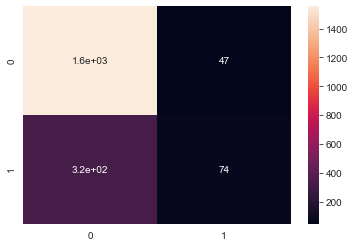

In [91]:
LGcmSFS = confusion_matrix(y_test, LG_y_predSFS )
print(LGcmSFS)

sns.heatmap(LGcmSFS, annot=True)

print(classification_report(y_test,  LG_y_predSFS))

In [92]:
area_under_curve = roc_auc_score(y_test, LG_y_predSFS)

print(area_under_curve)


0.5780535035277137


### Conclusion from Logistic Regression performance after SFS techniques :

Precision score increase from 0.52 to 0.61.

ROC score increase from 0.569 to 0.578.


### ROC AUC Curve Plot for Logistic Regression with important features (X_train/test_scSFSLG)

In [78]:
LGclassifier.predict_proba(X_test_scSFSLG).shape

(2000, 2)

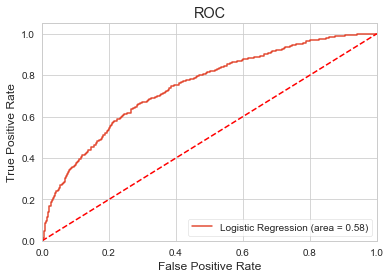

In [79]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, LGclassifier.predict_proba(X_test_scSFSLG)[:,1]) 

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Please refer to model tuning for Logistic Regression with grid search and SFS , seperated from base model ------- (A)

## 2) Support Vector Machine

#### Describtion :

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

#### Reasons : 

1) produces significant accuracy with less computation power\
2) Handle high dimensional data

In [80]:
from sklearn.svm import SVC

SVCclassifier = SVC(random_state = 888)

SVCclassifier.fit(X_train_sc, y_train)

SVC_y_pred = SVCclassifier.predict(X_test_sc)

In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': SVC_y_pred})

df.head()

,Actual,Predicted
208,1,0
8019,0,0
9487,0,0
5373,0,0
2579,1,0


[[1563   38]
 [ 241  158]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1601
           1       0.81      0.40      0.53       399

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



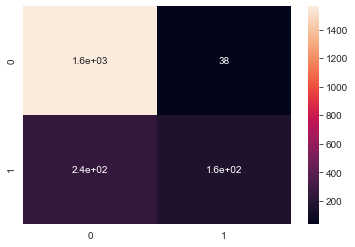

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

SVCcm= confusion_matrix(y_test, SVC_y_pred)  

print(SVCcm) 

sns.heatmap(SVCcm, annot=True)

print(classification_report(y_test, SVC_y_pred)) 

In [83]:
area_under_curve = roc_auc_score(y_test, SVC_y_pred)

print(area_under_curve)

0.6861274047078972


## Sequential Feature Selector  for SVM

### Types : Sequential Forward Selection (SFS) : using X_train/test_sc (scaled data ) for features selection

In [84]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfsSVM = SFS(SVCclassifier, 
          k_features='best', 
          forward=True, 
           cv=3)


In [85]:
sfsSVMF = sfsSVM.fit(X_train_sc, y_train)

In [86]:
sfsSVMF.k_feature_names_

('Age', 'Balance', 'Prod Number', 'ActMem', 'Geography_Germany', 'Gender_Male')

In [87]:
print('\nSelected feature indices:', sfsSVMF.k_feature_idx_)
print('CV Score:', sfsSVMF.k_score_)


Selected feature indices: (1, 3, 4, 6, 8, 10)
CV Score: 0.8611804452051098


In [88]:
pd.DataFrame.from_dict(sfsSVMF.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.8192048012003, 0.8150093808630394, 0.817636...",0.817283,"(Prod Number,)",0.00389493,0.00173083,0.00122388
2,"(1, 4)","[0.8435858964741185, 0.8397748592870544, 0.838...",0.84067,"(Age, Prod Number)",0.00475374,0.00211247,0.00149374
3,"(1, 4, 6)","[0.8555888972243061, 0.850656660412758, 0.8566...",0.854302,"(Age, Prod Number, ActMem)",0.00588347,0.00261449,0.00184873
4,"(1, 4, 6, 8)","[0.8582145536384096, 0.8529080675422139, 0.858...",0.856553,"(Age, Prod Number, ActMem, Geography_Germany)",0.00580755,0.00258076,0.00182487
5,"(1, 3, 4, 6, 8)","[0.8634658664666166, 0.8562851782363977, 0.863...",0.86093,"(Age, Balance, Prod Number, ActMem, Geography_...",0.00740156,0.0032891,0.00232575
6,"(1, 3, 4, 6, 8, 10)","[0.8623405851462865, 0.8570356472795497, 0.864...",0.86118,"(Age, Balance, Prod Number, ActMem, Geography_...",0.00680496,0.00302399,0.00213828
7,"(1, 2, 3, 4, 6, 8, 10)","[0.8608402100525131, 0.8570356472795497, 0.863...",0.86043,"(Age, Tenure, Balance, Prod Number, ActMem, Ge...",0.00589654,0.0026203,0.00185283
8,"(1, 2, 3, 4, 6, 7, 8, 10)","[0.8604651162790697, 0.8547842401500938, 0.862...",0.859179,"(Age, Tenure, Balance, Prod Number, ActMem, Es...",0.00719163,0.00319581,0.00225978
9,"(0, 1, 2, 3, 4, 6, 7, 8, 10)","[0.859714928732183, 0.8536585365853658, 0.8604...",0.857929,"(CredRate, Age, Tenure, Balance, Prod Number, ...",0.00682502,0.0030329,0.00214458
10,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10)","[0.859714928732183, 0.8514071294559099, 0.8611...",0.857428,"(CredRate, Age, Tenure, Balance, Prod Number, ...",0.00967318,0.00429856,0.00303954


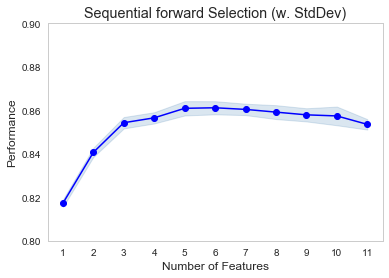

In [89]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfsSVMF.get_metric_dict(), kind='std_dev')

plt.ylim([0.80, 0.90])
plt.title('Sequential forward Selection (w. StdDev)')
plt.grid()
plt.show()

The avg score is highest at 6 features.

Clear indication that these having more features doesn't help in the accuracy. 

Stick to a simpler model

In [90]:
X_train_scSFSSVM = X_train_sc[['Age', 'Balance', 'Prod Number', 'ActMem', 'Geography_Germany', 'Gender_Male']]

X_train_scSFSSVM.head()

,Age,Balance,Prod Number,ActMem,Geography_Germany,Gender_Male
0,0.392554,-1.219797,-0.914412,0.973829,-0.580046,-1.089262
1,0.392554,-1.219797,0.815334,0.973829,-0.580046,0.918053
2,-0.467356,0.914573,-0.914412,0.973829,-0.580046,0.918053
3,-1.136175,-0.223131,0.815334,-1.026874,-0.580046,-1.089262
4,-0.180719,0.770881,0.815334,-1.026874,1.724001,-1.089262


In [91]:
X_test_scSFSSVM = X_test_sc[['Age', 'Balance', 'Prod Number', 'ActMem', 'Geography_Germany', 'Gender_Male']]

X_test_scSFSSVM.head()

,Age,Balance,Prod Number,ActMem,Geography_Germany,Gender_Male
0,0.562613,-1.251107,-0.901750,-1.046060,-0.573501,0.891814
1,3.213098,0.979421,0.777486,0.955968,-0.573501,-1.121310
2,-0.667970,-1.251107,-0.901750,0.955968,-0.573501,-1.121310
3,-0.857290,-1.251107,0.777486,0.955968,-0.573501,0.891814
4,-0.857290,0.817925,-0.901750,-1.046060,1.743675,0.891814


### SVM with important features (X_train/test_scSFSSVM)

In [92]:
SVCclassifier = SVC(random_state = 888)

SVCclassifier.fit(X_train_scSFSSVM, y_train)

SVC_y_predSFS = SVCclassifier.predict(X_test_scSFSSVM)

In [93]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': SVC_y_predSFS})

df.head()

,Actual,Predicted
208,1,0
8019,0,0
9487,0,0
5373,0,0
2579,1,0


[[1560   41]
 [ 242  157]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1601
           1       0.79      0.39      0.53       399

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



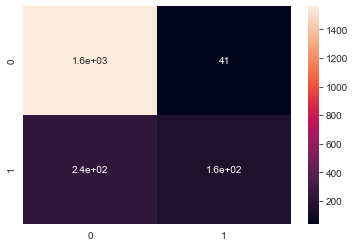

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

SVCcmSFS = confusion_matrix(y_test, SVC_y_predSFS)  

print(SVCcmSFS) 

sns.heatmap(SVCcmSFS, annot=True)

print(classification_report(y_test, SVC_y_predSFS)) 

In [95]:
area_under_curve = roc_auc_score(y_test, SVC_y_predSFS)

print(area_under_curve)


0.6839373574473347


### Conclusion from SVM perfomrance after SFS techniques :

Precision scored decrease from 0.81 to 0.79.

ROC score decrease from 0.686 to 0.683.

### ROC AUC Curve for SVM with important features (X_train/test_scSFSSVM)

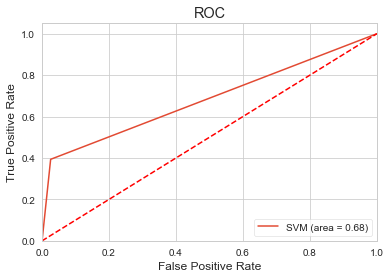

In [96]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, SVCclassifier.predict(X_test_scSFSSVM) , pos_label=1) 

plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Please refer to model tuning  for SVM with grid search and SFS , seperated from base model  ---- (B)

## 3) Random Forest


### Describtion :

RandomForestClassifier is to  creates decision trees on data samples and then gets the predictions form each of them and finally selects the best solution by means. Prediction parallelly.

Individually, predictions made by decision trees may not be accurate, but combined together, the better the  prediction 

### Reasons :

1) Solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.\
2) Handle large data set with higher dimensionality.\
3) The model outputs Importance of variable.\
4) It is able to still perform despite missing data and not be affected when some proportion of data are missing.\
– Not sensitive to outliers.\
– Does not require feature scaling.\
5) Decision Trees are prone to overfit (tree is very tailored to the dataset it fits, so overfitting occurs more). Random forest reduces that problem.\
6) Bagging : that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process

### Model training and testing RF using X_train/test without scaling

In [97]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(random_state = 888) 

RFclassifier.fit(X_train, y_train)

RF_y_pred = RFclassifier.predict(X_test)

[[1543   58]
 [ 211  188]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1601
           1       0.76      0.47      0.58       399

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



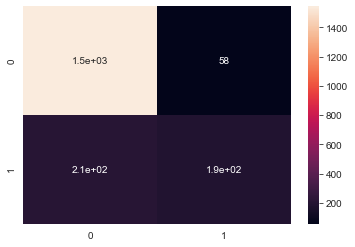

In [98]:
RFcm = confusion_matrix(y_test, RF_y_pred)
print(RFcm)

sns.heatmap(RFcm, annot= True)

print(classification_report(y_test,  RF_y_pred)) 

In [99]:
area_under_curve = roc_auc_score(y_test,RF_y_pred)

print(area_under_curve)

0.7174752934804218


## Sequential Feature Selector  for RF

### Types : Sequential Forward Selection (SFS) : using X_train/test (not scaled data ) for features selection

In [100]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfsRF = SFS(RFclassifier, 
          k_features='best', 
          forward=True, 
           cv=3)

In [101]:
sfsRFF = sfsRF.fit(X_train, y_train)

In [102]:
sfsRFF.k_feature_names_

('CredRate',
 'Age',
 'Tenure',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain')

In [103]:
print('\nSelected feature indices:', sfsRFF.k_feature_idx_)
print('CV Score:', sfsRFF.k_score_)


Selected feature indices: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
CV Score: 0.8598048198728856


In [104]:
pd.DataFrame.from_dict(sfsRFF.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.8192048012003, 0.8150093808630394, 0.817636...",0.817283,"(Prod Number,)",0.00389493,0.00173083,0.00122388
2,"(1, 4)","[0.8413353338334584, 0.8322701688555347, 0.836...",0.836793,"(Age, Prod Number)",0.00832816,0.00370086,0.00261691
3,"(1, 4, 6)","[0.8563390847711928, 0.851782363977486, 0.8465...",0.85155,"(Age, Prod Number, ActMem)",0.00901995,0.00400828,0.00283428
4,"(1, 4, 6, 8)","[0.8503375843960991, 0.8454033771106941, 0.855...",0.8503,"(Age, Prod Number, ActMem, Geography_Germany)",0.00896306,0.003983,0.0028164
5,"(1, 4, 5, 6, 8)","[0.8484621155288822, 0.8435272045028143, 0.846...",0.846298,"(Age, Prod Number, HasCrCard, ActMem, Geograph...",0.00463523,0.0020598,0.0014565
6,"(1, 4, 5, 6, 8, 9)","[0.8402100525131283, 0.8412757973733583, 0.845...",0.842296,"(Age, Prod Number, HasCrCard, ActMem, Geograph...",0.0050399,0.00223963,0.00158366
7,"(1, 3, 4, 5, 6, 8, 9)","[0.8402100525131283, 0.8337711069418386, 0.846...",0.840045,"(Age, Balance, Prod Number, HasCrCard, ActMem,...",0.011379,0.00505658,0.00357554
8,"(1, 3, 4, 5, 6, 7, 8, 9)","[0.8582145536384096, 0.851782363977486, 0.8551...",0.855052,"(Age, Balance, Prod Number, HasCrCard, ActMem,...",0.00591168,0.00262703,0.00185759
9,"(1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8600900225056264, 0.8529080675422139, 0.857...",0.856803,"(Age, Tenure, Balance, Prod Number, HasCrCard,...",0.00666854,0.00296336,0.00209541
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8604651162790697, 0.8547842401500938, 0.864...",0.859805,"(CredRate, Age, Tenure, Balance, Prod Number, ...",0.00868194,0.00385808,0.00272807


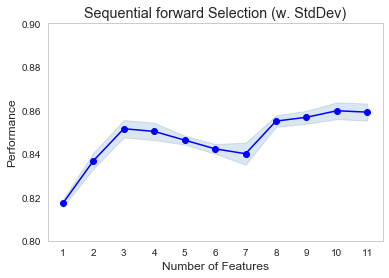

In [105]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfsRFF.get_metric_dict(), kind='std_dev')

plt.ylim([0.80, 0.90])
plt.title('Sequential forward Selection (w. StdDev)')
plt.grid()
plt.show()

The avg score is highest at  10 features.

Clear indication that these having more features doesn't help in the accuracy. 

Stick to a simpler model

In [106]:
X_train_SFSRF = X_train[['CredRate',
 'Age',
 'Tenure',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain']]

X_train_SFSRF.head()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Geography_Germany,Geography_Spain
7458,728,43.0,5,0.00,1,1,1,120088.17,0,1
1357,591,43.0,3,0.00,2,0,1,198926.36,0,0
4314,638,34.0,5,133501.36,1,0,1,155643.04,0,0
7439,432,27.0,6,62339.81,2,0,0,53874.67,0,0
2931,638,37.0,7,124513.66,2,1,0,158610.89,1,0


In [107]:
X_test_SFSRF = X_test[['CredRate',
 'Age',
 'Tenure',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain']]

X_test_SFSRF.head()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Geography_Germany,Geography_Spain
208,643,45.0,5,0.00,1,1,0,142513.50,0,0
8019,683,73.0,8,137732.23,2,1,1,133210.44,0,0
9487,850,32.0,5,0.00,1,1,1,3830.59,0,1
5373,776,30.0,6,0.00,2,0,1,63908.86,0,1
2579,365,30.0,0,127760.07,1,1,0,81537.85,1,0


### Random Forest with important features (X_train/test_SFSRF)

In [108]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(random_state = 888) 

RFclassifier.fit(X_train_SFSRF, y_train)

RF_y_predSFS = RFclassifier.predict(X_test_SFSRF)

In [109]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': RF_y_predSFS})

df.head()

,Actual,Predicted
208,1,1
8019,0,0
9487,0,0
5373,0,0
2579,1,1


[[1540   61]
 [ 204  195]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1601
           1       0.76      0.49      0.60       399

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



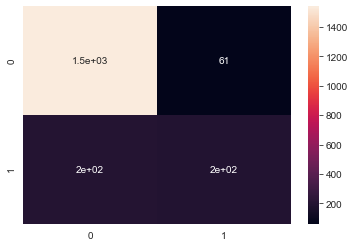

In [110]:
RFcmSFS = confusion_matrix(y_test, RF_y_predSFS)
print(RFcmSFS)

sns.heatmap(RFcmSFS, annot= True)

print(classification_report(y_test,  RF_y_predSFS)) 

In [111]:
area_under_curve = roc_auc_score(y_test,RF_y_predSFS)

print(area_under_curve)

0.7253103088765009


### Conclusion from Random Forest performance after SFS techniques 

Precision scored the same  0.76.

ROC score increase from 0.717 to 0.725.


### ROC AUC Curve for Random Forest with important features (X_train/test_SFSRF)

In [181]:
RFclassifier.predict_proba(X_test_SFSRF).shape

(2000, 2)

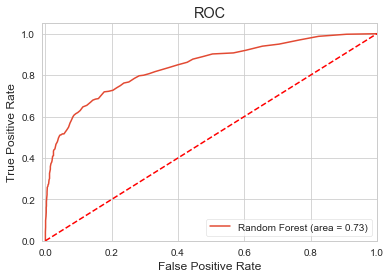

In [112]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, RFclassifier.predict_proba(X_test_SFSRF)[:,1]) 

plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###  FEATURE IMPORTANCE

Feature importance: how much each feature contributes to decreasing the weighted impurity 

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Only at random forest have this parameter can tell us which feature contribute more information (information gain) or top feature or .the best output of important features


In [342]:
len(RFclassifier.feature_importances_)

11

In [343]:
RFclassifier.feature_importances_

array([0.14243717, 0.2376152 , 0.08289741, 0.14577336, 0.12817145,
       0.01862766, 0.04149671, 0.14227613, 0.027147  , 0.01330707,
       0.02025083])

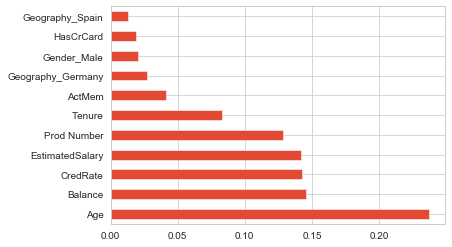

In [344]:
feat_importances = pd.Series(RFclassifier.feature_importances_ , index=X_test.columns)
feat_importances.nlargest(11).plot(kind='barh')


### Observation : 

Based on how useful the variables are at predicting a target variable ,from the score  assinged to input features above tell us that Age is the top feature in  contributing the most useful information in predicting the output (Exited) following by variables Balance, Credit Rate ,Estimated Slary and Product number.

### Please refer to model tuning  for RF with grid search and SFS , seperated from base model ---- (C)

## (4) Gradient Boosting 

### Description : 

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. 

### Reasons : 

1) Boosting, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy

2) Learning rate parameter : corresponds to how quickly the error is corrected from each tree to the next and is a simple multiplier 0<LR≤1.

Notes :

A larger learning rate may cause overfitting as it tunes very quickly to a few bunch of models to achieve a reduction in error, as compared to a smaller learning rate that requires more trees but less prone to 'drastic' error reductions.

When learning rate decreases, the number of trees needed will increase to achieve the same level of learning as a higher learning rate with less trees.

learning rate range: generally, default value of 0.1 works but somewhere between 0.05 to 0.2 could be tested for different problems



In [191]:
from sklearn.ensemble import GradientBoostingClassifier 

GBclassifier = GradientBoostingClassifier(random_state = 888)

In [192]:
GBclassifier.fit(X_train, y_train)

GB_y_pred = GBclassifier.predict(X_test)

In [193]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': GB_y_pred})

df.head()

,Actual,Predicted
208,1,1
8019,0,0
9487,0,0
5373,0,0
2579,1,1


[[1563   38]
 [ 241  158]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1601
           1       0.74      0.46      0.57       399

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



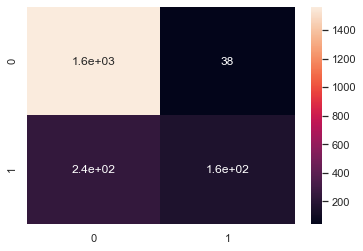

In [194]:
from sklearn.metrics import confusion_matrix, classification_report

GBcm= confusion_matrix(y_test, SVC_y_pred)  

print(GBcm) 

sns.heatmap(GBcm, annot=True)

print(classification_report(y_test, GB_y_pred)) 

In [195]:
area_under_curve = roc_auc_score(y_test, GB_y_pred)

print(area_under_curve)

0.7115297613177227


## Sequential Feature Selector  for GB

### Types : Sequential Forward Selection (SFS) : using X_train/testSFSGB (not scaled data ) for features selection

In [196]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfsGB = SFS(GBclassifier, 
          k_features='best', 
          forward=True, 
           cv=3)


In [197]:
sfsGBF = sfsGB.fit(X_train, y_train)

In [198]:
sfsGBF.k_feature_names_

('Age',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'Geography_Germany',
 'Gender_Male')

In [199]:
print('\nSelected feature indices:', sfsGBF.k_feature_idx_)
print('CV Score:', sfsGBF.k_score_)


Selected feature indices: (1, 3, 4, 5, 6, 8, 10)
CV Score: 0.8655572898853231


In [200]:
pd.DataFrame.from_dict(sfsGBF.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.8192048012003, 0.8150093808630394, 0.817636...",0.817283,"(Prod Number,)",0.00389493,0.00173083,0.00122388
2,"(1, 4)","[0.8424606151537885, 0.8382739212007505, 0.837...",0.839419,"(Age, Prod Number)",0.00488823,0.00217223,0.001536
3,"(1, 4, 6)","[0.8559639909977494, 0.8532833020637899, 0.852...",0.853927,"(Age, Prod Number, ActMem)",0.00331428,0.0014728,0.00104142
4,"(1, 4, 6, 8)","[0.8582145536384096, 0.8570356472795497, 0.857...",0.857679,"(Age, Prod Number, ActMem, Geography_Germany)",0.00109644,0.000487235,0.000344527
5,"(1, 3, 4, 6, 8)","[0.8675918979744937, 0.8607879924953096, 0.860...",0.862806,"(Age, Balance, Prod Number, ActMem, Geography_...",0.00764689,0.00339812,0.00240283
6,"(1, 3, 4, 6, 8, 10)","[0.8675918979744937, 0.8626641651031894, 0.862...",0.864182,"(Age, Balance, Prod Number, ActMem, Geography_...",0.00543738,0.00241626,0.00170855
7,"(1, 3, 4, 5, 6, 8, 10)","[0.8694673668417104, 0.8645403377110694, 0.862...",0.865557,"(Age, Balance, Prod Number, HasCrCard, ActMem,...",0.00645614,0.00286898,0.00202867
8,"(1, 2, 3, 4, 5, 6, 8, 10)","[0.8687171792948237, 0.8619136960600375, 0.863...",0.864807,"(Age, Tenure, Balance, Prod Number, HasCrCard,...",0.00645643,0.0028691,0.00202876
9,"(1, 2, 3, 4, 5, 6, 8, 9, 10)","[0.8690922730682671, 0.8615384615384616, 0.862...",0.864432,"(Age, Tenure, Balance, Prod Number, HasCrCard,...",0.00748788,0.00332746,0.00235287
10,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)","[0.8675918979744937, 0.8626641651031894, 0.862...",0.864307,"(Age, Tenure, Balance, Prod Number, HasCrCard,...",0.00522742,0.00232296,0.00164258


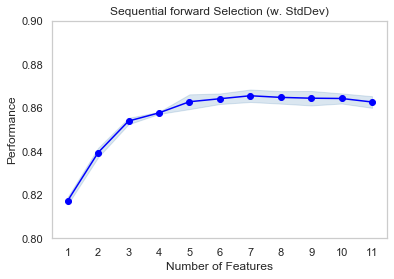

In [201]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfsGBF.get_metric_dict(), kind='std_dev')

plt.ylim([0.80, 0.90])
plt.title('Sequential forward Selection (w. StdDev)')
plt.grid()
plt.show()

The avg score is highest at 7 features.

Clear indication that these having more features doesn't help in the accuracy. 

Stick to a simpler model

In [202]:
X_train_SFSGB = X_train[['Age',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'Geography_Germany',
 'Gender_Male']]

X_train_SFSGB.head()

,Age,Balance,Prod Number,HasCrCard,ActMem,Geography_Germany,Gender_Male
7458,43.0,0.00,1,1,1,0,0
1357,43.0,0.00,2,0,1,0,1
4314,34.0,133501.36,1,0,1,0,1
7439,27.0,62339.81,2,0,0,0,0
2931,37.0,124513.66,2,1,0,1,0


In [203]:
X_test_SFSGB = X_test[['Age',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'Geography_Germany',
 'Gender_Male']]

X_test_SFSGB.head()

,Age,Balance,Prod Number,HasCrCard,ActMem,Geography_Germany,Gender_Male
208,45.0,0.00,1,1,0,0,1
8019,73.0,137732.23,2,1,1,0,0
9487,32.0,0.00,1,1,1,0,0
5373,30.0,0.00,2,0,1,0,1
2579,30.0,127760.07,1,1,0,1,1


### Gradient Boosting with important features (X_train/test_SFSGB)

In [204]:
from sklearn.ensemble import GradientBoostingClassifier 

GBclassifier = GradientBoostingClassifier(random_state = 888)

GBclassifier.fit(X_train_SFSGB, y_train)

GB_y_predSFS = GBclassifier.predict(X_test_SFSGB)

In [205]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': GB_y_predSFS})

df.head()

,Actual,Predicted
208,1,1
8019,0,0
9487,0,0
5373,0,0
2579,1,0


[[1532   69]
 [ 212  187]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1601
           1       0.73      0.47      0.57       399

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



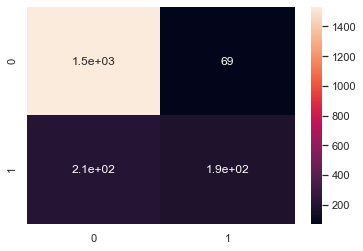

In [206]:
GBcmSFS = confusion_matrix(y_test, GB_y_predSFS)
print(GBcmSFS)

sns.heatmap(GBcmSFS, annot= True)

print(classification_report(y_test,  GB_y_predSFS)) 

In [207]:
area_under_curve = roc_auc_score(y_test,GB_y_predSFS)

print(area_under_curve)

0.7127868077439069


### Conclusion from Gradient Boosting performance after SFS techniques 

Precision decrease from 0.74 to  0.73.

ROC score  not significant increasement  from 0.711 to 0.712.


### ROC AUC Curve for Gradient Boosting with important features (X_train/test_SFSGB)

In [209]:
GBclassifier.predict_proba(X_test_SFSGB).shape

(2000, 2)

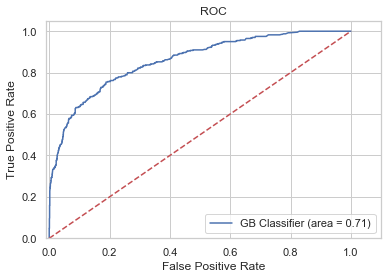

In [220]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, GBclassifier.predict_proba(X_test_SFSGB)[:,1]) 

plt.plot(fpr, tpr, label='GB Classifier (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.10])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### GRIDSerarchCV  : Model tuning Gradien Boosting with grid search(X_train/test)

In [351]:
GBclassifier = GradientBoostingClassifier(random_state = 888)

param_dict_gb =  {'n_estimators' : [50 , 100] , 
                  'max_depth' : [5 , 10],
                 'learning_rate' : [0.05, 0.1]} 

In [352]:
grid_model_gb = GridSearchCV(estimator=GBclassifier,
                          param_grid= param_dict_gb, 
                          cv= 3 , verbose=2)

In [353]:
grid_model_gb.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] learning_rate=0.05, max_depth=5, n_estimators=50 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . learning_rate=0.05, max_depth=5, n_estimators=50, total=   1.1s
[CV] learning_rate=0.05, max_depth=5, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] . learning_rate=0.05, max_depth=5, n_estimators=50, total=   1.2s
[CV] learning_rate=0.05, max_depth=5, n_estimators=50 ................
[CV] . learning_rate=0.05, max_depth=5, n_estimators=50, total=   1.2s
[CV] learning_rate=0.05, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=5, n_estimators=100, total=   2.3s
[CV] learning_rate=0.05, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=5, n_estimators=100, total=   2.4s
[CV] learning_rate=0.05, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=5, n_estimators=100, total=   2.4s
[CV] learning_rate=0.05, max_depth=10, n_estimators=50 ...............
[CV]  learning_rate=0.05, max_depth=10, n_estimators=50, total=   3.2s
[CV] learning_rate=0.05, max_depth=10, n_estimators=50 ...............
[CV]  learning_rate=0.05, max_depth=10, n_estimators=50, total=   3.3s
[CV] learning_rate=0.05, max_depth=10, n_estimators=50 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [354]:
grid_model_gb.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

In [355]:
GB_y_predGS =grid_model_gb.predict(X_test)

[[1554   47]
 [ 325   74]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1601
           1       0.77      0.49      0.60       399

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



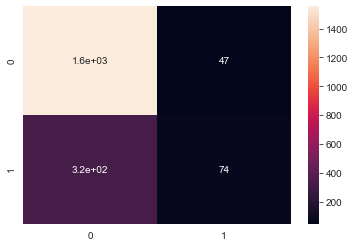

In [356]:
GBcmGS = confusion_matrix(y_test, LG_y_pred2 )
print(GBcmGS)

sns.heatmap(GBcmGS, annot=True)

print(classification_report(y_test, GB_y_predGS))

In [357]:
from sklearn.metrics import roc_auc_score

area_under_curve = roc_auc_score(y_test, GB_y_predGS)

print(area_under_curve)


0.7246817856634089


### Observation GB after tuning with GridsearchCV :


ROC score improve after tuning from 0.711 to 0.724


### (A) GRIDSerarchCV and SFS : Model tuning Logistic Regression with grid search and SFS (X_train/test_scSFSLG)

In [93]:
from sklearn.model_selection import GridSearchCV
 

LGclassifier = LogisticRegression(random_state = 888)

param_dict_LG = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 
              'penalty':['l2']}
    


### The hyperparameters we tuned are:
Penalty: l1 or l2 which species the norm used in the penalization.
C: Inverse of regularization strength- smaller values of C specify stronger regularization.
Max_iter : Maximum number of iterations taken for the solvers to converge.

In [94]:
grid_model_LG = GridSearchCV(estimator=LGclassifier, param_grid = param_dict_LG ,
                           cv=5, verbose = 1)

grid_model_LG.fit(X_train_scSFSLG, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=888, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100], 'max_iter': [250],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [95]:
grid_model_LG.best_params_

{'C': 10, 'max_iter': 250, 'penalty': 'l2'}

In [96]:
LG_y_predGSF =grid_model_LG.predict(X_test_scSFSLG)

[[1554   47]
 [ 325   74]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1601
           1       0.61      0.19      0.28       399

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



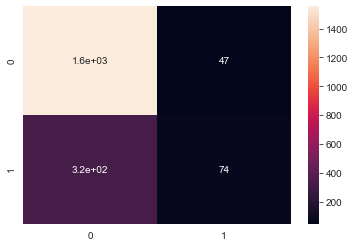

In [97]:
LGcmGSF = confusion_matrix(y_test, LG_y_predGSF)
print(LGcmGSF)

sns.heatmap(LGcmGSF, annot=True)

print(classification_report(y_test,  LG_y_predGSF))

In [98]:
from sklearn.metrics import roc_auc_score

area_under_curve = roc_auc_score(y_test, LG_y_predGSF)

print(area_under_curve)


0.5780535035277137


### Observation Logistic Regression after tuning with GridsearchCV and SFS:

ROC score not improving after tuning with the same score of 0.578.

Not imporove compare to the score using SFS = 0.578



### (B) GRIDSerarchCV and SFS : Model tuning SVM with grid search and SFS  (X_train/ test_scSFSSVM)

In [327]:
from sklearn.model_selection import GridSearchCV

SVCclassifier = SVC(random_state = 888)

param_dict_SVM = {'gamma': [0.1,0.01,0.001], 'C': [0.5,100,150] }

### The hyperparameters we tuned are:

Cfloat, default=1.0 Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

gamma{‘scale’, ‘auto’} or float, default=’scale’ Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

In [328]:
grid_model_SVM = GridSearchCV(SVCclassifier, param_grid = param_dict_SVM, cv=3,  verbose=0)

grid_model_SVM.fit(X_train_scSFSSVM, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=888, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 100, 150], 'gamma': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [329]:
grid_model_SVM.best_params_

{'C': 150, 'gamma': 0.1}

In [330]:
SVC_y_predGSF =grid_model_SVM.predict(X_test_scSFSSVM)

[[1548   53]
 [ 223  176]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1601
           1       0.77      0.44      0.56       399

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



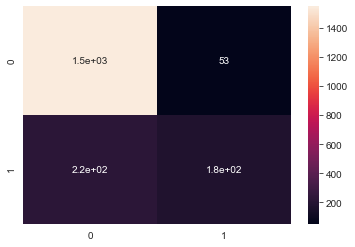

In [333]:
SVCcmGSF = confusion_matrix(y_test, SVC_y_predGSF)
print(SVCcmGSF)

sns.heatmap(SVCcmGSF, annot=True)

print(classification_report(y_test, SVC_y_predGSF)) 

In [334]:
area_under_curve = roc_auc_score(y_test,SVC_y_predGSF)

print(area_under_curve)

0.7039992235429298


### Observation SVM after tuning with GridsearchCV and SFS:


ROC score improve after tuning from 0.686 to 0.70

Imporove compare to the score using SFS = 0.683


### (C) GRIDSerarchCV and SFS : Model tuning RF with grid search and SFS  (X_train/ test_SFSRF)

In [367]:
from sklearn.model_selection import GridSearchCV

RFclassifier = RandomForestClassifier(random_state = 888) 

param_dict_RF = { 
               'max_depth' : [2,3,4,5] , 
               'criterion': ['gini','entropy'],
               'n_estimators': [10, 50 , 100]}

### The hyperparameters we tuned are:

max_depth: The maximum depth of the tree. (the deeper the more complex)

max_features: controls the number of features to search for each split (default is search all features) , default is auto.

n estimators = The number of trees in the forest.

criterion{“gini”, “entropy”}, default=”gini”: 
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 



In [368]:
grid_model_RF = GridSearchCV(estimator=RFclassifier, 
                             param_grid = param_dict_RF , 
                             cv=5 , verbose= 1)

In [369]:
grid_model_RF.fit(X_train_SFSRF, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   31.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=888,
                                 

In [370]:
grid_model_RF.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}

In [371]:
RF_y_predGSF = grid_model_RF.predict(X_test_SFSRF)

[[1576   25]
 [ 251  148]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1601
           1       0.86      0.37      0.52       399

    accuracy                           0.86      2000
   macro avg       0.86      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000



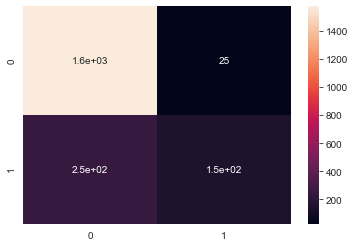

In [372]:
RFcmGSF = confusion_matrix(y_test, RF_y_predGSF)
print(RFcmGSF)

sns.heatmap(RFcmGSF, annot= True)

print(classification_report(y_test,  RF_y_predGSF))

In [373]:
area_under_curve = roc_auc_score(y_test,RF_y_predGSF)

print(area_under_curve)

0.6776560389105181


### Observation RF after tuning with GridsearchCV and SFS:


ROC score drop after tuning from 0.717 to 0.678

Drop compare to the score using SFS = 0.725


# Conclusion : 

A Good Model is not the one that gives accurate predictions on the known data or training data but the one which gives good predictions on the new data and avoids overfitting and underfitting.


Random Forest will be recommanded to stakeholder to use as mode in prediction based on the following reasons:

## 1) Performance in boosting the accuracy of the model.
With inspect of the performance of 4 models after using the features selection and GridSearch CV methods in boosting the accuracy in prediction of the model , we found that RF has the great performance in comparing with others models by using SFS boosting method.

Take note that performance of the model are base in the ROC score intead of accuracy score as the natural of the data is imbalance and by the rules of thumb , accurcay score will not take into account to evaluate the model performances.

**(Please refer to the Table A and ROC curve rules of thumb for more details----B)**

ROC score in descending order :(comparison base on ROC AUC score model training after using SFS)\
***Random Forest : 0.73*** - The highest score among the other model\
Gradient Boosting : 0.71\
Support Vector Machine : 0.68\
Logistic Regression : 0.58


## 2) Benefits gaining from using RF as a model : 

***Overfitting :***\
Random Forest do not over fit and the performance not decrease as the number of trees increases. Hence, after certain number of trees the performance tend to stay in a certain value. 

***Balance the bias and variance issues in the model training.***\
Too many data tend to high variance.\
Too little data tend to high bias\
***The middle inflexion point right before total error\
increases is our sweet spot: the balance between bias and variance.

***Able to perform well despite of :***|
-missing data and not be affected when some proportion of data are missing.
– Not sensitive to outliers.
– Does not require feature scaling

***One of powerful and useful function of RF is able to output important features.***

## 3) Able to capture acceptable score for Precision and Recall 

From the ROC score above , another reasons why Random Forest preforms better than the other model is random forest has a high true and false positive rate as the number of explanatory variables (features/columns) increases in a dataset/ train in many subsets . Hence , match with our objective in predicting the potential churners which we target in reduce the FP (false positive)---Precision score.

The bank objective is to increase the market share in Europe . We can not tolerate and accept the customers not churn but predicted as churned (FP) , as this will affect the marketing team distribute the wrong budget to wrong target of group. As a result, customers continuing to leave the bank and caused the bank in loosing of customers and profits.




### Why Random Forest not Logistic Regression ? 

Logistic Regression performs better when the number of noise variables is less than or equal to the number of explanatory variables.

Random Forest still perform well if there are noises and outliers.

### Why Random Forest not Support Vector Machine?

The computation complexity(time complexity) of Support Vector Machine is much higher than Random Forest.

This means that traning SVM will be longer than to train RF when the size of the training data is higher. 

Therefor , RF is more prefered when the data set grows larger and the power of RF in working in high dimensional data and the function of splitting the data by boosting strapping will increase the performance of the model .

### Why Random Forest not Gradiant Boosting?

Gradient Boosting also combine of decision trees , but it works sequencetially which start combining process at the beginning , instead of at the end . 

Eventhough the accurracy is good but the sequencetially methods will low down the model performance.

Random Forest has good preformence as it works parallelly and predict individually the Decision Tree and using average or majority votting at the end of the process. Split randomly by boosting strapping , hence fast and accurate.



***(A) Table of Score Comparison of 4 models --please refer to table (table.pdf)***





***(B) ROC curve describes good discrimination/ accuracy? (Rules of thumb)***

Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a\ worthless test. A rough guid for classifying the accuracy of a diagnostic test is the traditional academic point system":\
.90-1 = excellent (A)\
.80-.90 = good (B)\
.70-.80 = fair (C)\
.60-.70 = poor (D)\
.50-.60 = fail (F)

## It depends on the context. 

In ***medical diagnosis*** such as healthcare sector, a very high AUC ROC score (0.95 or higher) are attempting to looking for. 

From the aspect of  ***psychology and prediction of future behavior***, with all the factors that can influence, AUC ROC score values of 0.70 and higher would be considered a signigicant impact. 
